<a href="https://colab.research.google.com/github/liamchalcroft/RectAngle/blob/main/colab_from_package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://49064dc98b2d46c3874378ed4375bf1b5938d905@github.com/liamchalcroft/RectAngle.git

Cloning into 'RectAngle'...
remote: Enumerating objects: 715, done.
remote: Counting objects: 100% (715/715), done.
remote: Compressing objects: 100% (335/335), done.
remote: Total 715 (delta 429), reused 551 (delta 280), pack-reused 0
Receiving objects: 100% (715/715), 388.74 KiB | 3.24 MiB/s, done.
Resolving deltas: 100% (429/429), done.


In [2]:
! pip uninstall rectangle -y; cd RectAngle; git pull; pip install . -q

Already up to date.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [3]:
! python RectAngle/data.py

Done.
Image and label data downloaded: dataset70-200.h5
  with 200 cases with a total of 5346 frames and 16038 labels.


In [4]:
import rectangle as rect
import h5py
import matplotlib.pyplot as plt
import torch
from scipy.stats import linregress

In [5]:
f = h5py.File('dataset70-200.h5', 'r')

In [6]:
if torch.cuda.is_available():
  device = torch.device('cuda')
  torch.backends.cudnn.benchmark = True
else:
  device = torch.device('cpu')

# model_ = rect.model.networks.UNet(n_layers=5, device=device, gate='attention')
# model_ = rect.model.networks.UNet(n_layers=5, device=device, gate=None)

In [7]:
train_ix, test_ix, _ = rect.utils.io.train_val_test(f, ratio=(0.8,0.2,0))

train_keys, test_keys = rect.utils.io.key_gen(f, train_ix), \
                        rect.utils.io.key_gen(f, test_ix)

train_data,  test_data = rect.utils.io.H5DataLoader(f, train_keys,'random'), \
                          rect.utils.io.H5DataLoader(f, test_keys, label='vote')

test_plot_data = rect.utils.io.TestPlotLoader(f, test_keys, label='vote')

In [8]:
model_rand = rect.model.networks.UNet(n_layers=5, device=device, gate='attention')
train_data_rand = rect.utils.io.H5DataLoader(f, train_keys, label='random')
trainer_rand = rect.utils.train.Trainer(model_rand, ensemble=5, outdir='./random')
trainer_rand.train(train_data, train_pre=[rect.utils.transforms.z_score(), rect.utils.transforms.Flip(), rect.utils.transforms.Affine(), rect.utils.transforms.SpeckleNoise()], 
              val_pre=[rect.utils.transforms.z_score()])
trainer_rand.test(test_data, test_pre=[rect.utils.transforms.z_score()], 
             test_post=[rect.utils.transforms.Binary(), rect.utils.transforms.KeepLargestComponent()])
trainer_rand.test(test_plot_data, test_pre=[rect.utils.transforms.z_score()], 
             test_post=[rect.utils.transforms.Binary(), rect.utils.transforms.KeepLargestComponent()])

In [9]:
model_vote = rect.model.networks.UNet(n_layers=5, device=device, gate='attention')
train_data_vote = rect.utils.io.H5DataLoader(f, train_keys, label='vote')
trainer_vote = rect.utils.train.Trainer(model_vote, ensemble=5, outdir='./vote')
trainer_vote.train(train_data, train_pre=[rect.utils.transforms.z_score(), rect.utils.transforms.Flip(), rect.utils.transforms.Affine(), rect.utils.transforms.SpeckleNoise()], 
              val_pre=[rect.utils.transforms.z_score()])
trainer_vote.test(test_data, test_pre=[rect.utils.transforms.z_score()], 
             test_post=[rect.utils.transforms.Binary(), rect.utils.transforms.KeepLargestComponent()])
trainer_vote.test(test_plot_data, test_pre=[rect.utils.transforms.z_score()], 
             test_post=[rect.utils.transforms.Binary(), rect.utils.transforms.KeepLargestComponent()])

In [10]:
model_mean = rect.model.networks.UNet(n_layers=5, device=device, gate='attention')
train_data_mean = rect.utils.io.H5DataLoader(f, train_keys, label='mean')
trainer_mean = rect.utils.train.Trainer(model_mean, ensemble=5, outdir='./mean')
trainer_mean.train(train_data, train_pre=[rect.utils.transforms.z_score(), rect.utils.transforms.Flip(), rect.utils.transforms.Affine(), rect.utils.transforms.SpeckleNoise()], 
              val_pre=[rect.utils.transforms.z_score()])
trainer_mean.test(test_data, test_pre=[rect.utils.transforms.z_score()], 
             test_post=[rect.utils.transforms.Binary(), rect.utils.transforms.KeepLargestComponent()])
trainer_mean.test(test_plot_data, test_pre=[rect.utils.transforms.z_score()], 
             test_post=[rect.utils.transforms.Binary(), rect.utils.transforms.KeepLargestComponent()])

In [11]:
# import numpy as np

# rand_dice = np.genfromtxt('./random/testing/table/dice_Apr-01-2021.csv', delimiter=',')
# rand_prec = np.genfromtxt('./random/testing/table/precision_Apr-01-2021.csv', delimiter=',')
# rand_rec = np.genfromtxt('./random/testing/table/recall_Apr-01-2021.csv', delimiter=',')

# vote_dice = np.genfromtxt('./vote/testing/table/dice_Apr-01-2021.csv', delimiter=',')
# vote_prec = np.genfromtxt('./vote/testing/table/precision_Apr-01-2021.csv', delimiter=',')
# vote_rec = np.genfromtxt('./vote/testing/table/recall_Apr-01-2021.csv', delimiter=',')

# mean_dice = np.genfromtxt('./mean/testing/table/dice_Apr-01-2021.csv', delimiter=',')
# mean_prec = np.genfromtxt('./mean/testing/table/precision_Apr-01-2021.csv', delimiter=',')
# mean_rec = np.genfromtxt('./mean/testing/table/recall_Apr-01-2021.csv', delimiter=',')

In [12]:
# # create violin plots of dice scores

# plt.figure(figsize=(16,8))

# plt.subplot(131)
# plt.violinplot([rand_dice, vote_dice, mean_dice], showmeans=True)
# plt.ylabel('Dice Coefficient')
# plt.xticks([1, 2, 3], ['Random Sampling', 'Vote Sampling', 'Mean (soft) Sampling'])

# plt.subplot(132)
# plt.violinplot([rand_prec, vote_prec, mean_prec], showmeans=True)
# plt.ylabel('Precision')
# plt.xticks([1, 2, 3], ['Random Sampling', 'Vote Sampling', 'Mean (soft) Sampling'])

# plt.subplot(133)
# plt.violinplot([rand_rec, vote_rec, mean_rec], showmeans=True)
# plt.ylabel('Recall')
# plt.xticks([1, 2, 3], ['Random Sampling', 'Vote Sampling', 'Mean (soft) Sampling'])

# plt.show()

In [13]:
# def bland_altman_plot(data1, data2, *args, **kwargs):
#     mean      = np.mean([data1, data2], axis=0)
#     diff      = data1 - data2                   # Difference between data1 and data2
#     md        = np.mean(diff)                   # Mean of the difference
#     sd        = np.std(diff, axis=0)            # Standard deviation of the difference
#     fit = linregress(mean, diff)
#     rsq = fit.rvalue**2
#     x = np.linspace(mean.min(), mean.max())
#     y = fit.slope * x + fit.intercept

#     plt.scatter(mean, diff, *args, **kwargs)
#     plt.plot(x, y, '--', c='r')
#     plt.text(x[-1], y[-1], '$R^2$ = {:.3f}'.format(rsq), c='r')
#     plt.axhline(md,           color='gray', linestyle='--')
#     plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
#     plt.axhline(md - 1.96*sd, color='gray', linestyle='--')

In [14]:
# plt.figure(figsize=(16,8))
# plt.subplot(131)
# bland_altman_plot(rand_dice, vote_dice)
# plt.ylim([-1.1, 1.1])
# plt.xlim([-0.1, 1.1])
# plt.xlabel('Mean Dice')
# plt.ylabel('Difference in Dice')
# plt.title('Random vs. Vote')
# plt.subplot(132)
# bland_altman_plot(mean_dice, vote_dice)
# plt.ylim([-1.1, 1.1])
# plt.xlim([-0.1, 1.1])
# plt.title('Mean vs. Vote')
# plt.subplot(133)
# bland_altman_plot(rand_dice, mean_dice)
# plt.ylim([-1.1, 1.1])
# plt.xlim([-0.1, 1.1])
# plt.title('Random vs. Mean')
# plt.show()

In [15]:
# bland_altman_plot(rand_dice, mean_dice)

In [16]:
class_train_ix, class_val_ix, _ = rect.utils.io.train_val_test(f, ratio=(0.6,0.2,0.2))

class_train_keys, class_val_keys = rect.utils.io.key_gen(f, class_train_ix), rect.utils.io.key_gen(f, class_val_ix)

class_train_data, class_val_data = rect.utils.io.ClassifyDataLoader(f, class_train_keys), rect.utils.io.ClassifyDataLoader(f, class_val_keys)

In [17]:
class_train_data = rect.utils.io.ClassifyDataLoader(f, class_train_keys)

In [18]:
class_model = rect.model.networks.MakeDenseNet().to(device)

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


In [19]:
class_trainer = rect.utils.train.ClassTrainer(class_model, outdir='./classlogs',
                                         ensemble=None)

Epoch #0: Mean acc Loss: 0.6696661114692688
Mean Validation acc: 0.45357142857142857
Epoch #1: Mean acc Loss: 0.5967686176300049
Epoch #2: Mean acc Loss: 0.5935425162315369
Epoch #3: Mean acc Loss: 0.5401740074157715
Epoch #4: Mean acc Loss: 0.4990276098251343
Epoch #5: Mean acc Loss: 0.5860914587974548
Mean Validation acc: 0.6964285714285714
Epoch #6: Mean acc Loss: 0.5376402735710144
Epoch #7: Mean acc Loss: 0.5028128623962402
Epoch #8: Mean acc Loss: 0.6069912314414978
Epoch #9: Mean acc Loss: 0.4520077705383301
Epoch #10: Mean acc Loss: 0.4567717909812927
Mean Validation acc: 0.6892857142857143
Epoch #11: Mean acc Loss: 0.5439031720161438
Epoch #12: Mean acc Loss: 0.5167207717895508
Epoch #13: Mean acc Loss: 0.5122398734092712
Epoch #14: Mean acc Loss: 0.4612293839454651
Epoch #15: Mean acc Loss: 0.5171852707862854
Mean Validation acc: 0.6678571428571429
Epoch #16: Mean acc Loss: 0.5050668120384216
Epoch #17: Mean acc Loss: 0.538873016834259
Epoch #18: Mean acc Loss: 0.409353792667

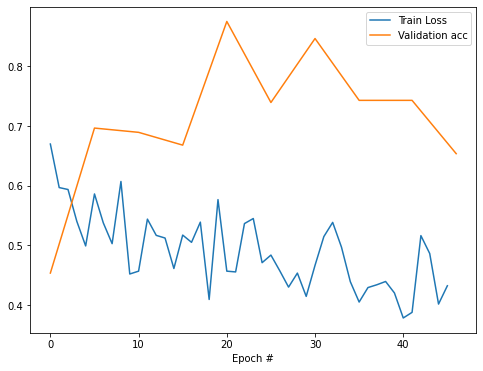

In [20]:
class_trainer.train(class_train_data, class_val_data)

In [ ]:
test_screen_data = rect.utils.io.PreScreenLoader(class_model, f, test_keys, label='vote',
                                                 threshold = 0.5)
trainer_vote.test(test_screen_data, test_pre=[rect.utils.transforms.z_score()], 
             test_post=[rect.utils.transforms.Binary(), rect.utils.transforms.KeepLargestComponent()])